In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [55]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [57]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [58]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [59]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [60]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

In [61]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [62]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [63]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [64]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Unmarried','Single')

In [65]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64

In [66]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [67]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [68]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [69]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]

In [70]:
feature_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [71]:
for feature in feature_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),"% missing values")

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [72]:
df[feature_na].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [73]:
df[feature_na].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4662 non-null   float64
 1   TypeofContact             4863 non-null   object 
 2   DurationOfPitch           4637 non-null   float64
 3   NumberOfFollowups         4843 non-null   float64
 4   PreferredPropertyStar     4862 non-null   float64
 5   NumberOfTrips             4748 non-null   float64
 6   NumberOfChildrenVisiting  4822 non-null   float64
 7   MonthlyIncome             4655 non-null   float64
dtypes: float64(7), object(1)
memory usage: 305.6+ KB


In [74]:
#Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [75]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [76]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [77]:
df.drop(columns=['CustomerID'],inplace=True,axis=1)

In [78]:
df['total_person_visit'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],inplace=True,axis=1)

In [79]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,total_person_visit
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [80]:
x = df.drop(columns=['ProdTaken'],axis=1)
y = df['ProdTaken']

In [81]:
x

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,total_person_visit
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Single,2.0,1,1,1,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [82]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [84]:
x_train.shape

(3910, 17)

In [85]:
x_test.shape

(978, 17)

In [86]:
x_test

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,total_person_visit
144,32.0,Company Invited,3,13.0,Small Business,Male,5.0,Deluxe,3.0,Married,1.0,0,2,0,Manager,19668.0,3.0
79,46.0,Self Enquiry,2,11.0,Small Business,Male,4.0,Deluxe,4.0,Married,1.0,1,5,0,Manager,20021.0,4.0
2098,37.0,Self Enquiry,3,22.0,Small Business,Male,4.0,Deluxe,3.0,Married,5.0,0,5,1,Manager,21334.0,3.0
4738,43.0,Self Enquiry,1,36.0,Small Business,Male,6.0,Deluxe,3.0,Single,6.0,0,3,1,Manager,22950.0,5.0
2858,25.0,Self Enquiry,3,7.0,Large Business,Female,4.0,Basic,4.0,Single,3.0,1,4,1,Executive,21880.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,38.0,Self Enquiry,1,7.0,Large Business,Female,4.0,Standard,3.0,Single,6.0,0,5,1,Senior Manager,26169.0,5.0
2059,29.0,Self Enquiry,1,6.0,Salaried,Female,4.0,Basic,5.0,Married,2.0,1,1,0,Executive,17319.0,2.0
4872,35.0,Company Invited,1,24.0,Large Business,Male,5.0,Basic,3.0,Married,2.0,1,5,1,Executive,27178.0,5.0
843,26.0,Self Enquiry,1,13.0,Small Business,Male,1.0,Basic,3.0,Divorced,2.0,0,5,1,Executive,22347.0,3.0


In [87]:
cat_features = x.select_dtypes(include="object").columns
num_features = x.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [88]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome',
       'total_person_visit'],
      dtype='object'))])

In [89]:
x_train=preprocessor.fit_transform(x_train)

In [90]:
x_train = pd.DataFrame(x_train)

In [91]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.157926,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.508072,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.396069,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.064073,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.730071,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.045924,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.397072,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.064073,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.045924,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [92]:
x_test = preprocessor.transform(x_test)

In [93]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,f1_score,recall_score,roc_auc_score,roc_curve

In [95]:
model = {
    "random forest classifier":RandomForestClassifier(),
    "Gradient Boosting Classifier" : GradientBoostingClassifier(),
    "Gradient Boosting Classifier" : DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBClassifier": XGBClassifier(),
    "adaboost classifier": AdaBoostClassifier()
}

for i in range(len(list(model))):
    models = list(model.values())[i]
    models.fit(x_train,y_train)

    y_train_pred = models.predict(x_train)
    y_test_pred = models.predict(x_test)

     # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(model.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print("="*35)
    print("\n")

    

random forest classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9325
- F1 score: 0.9277
- Precision: 0.9699
- Recall: 0.6754
- Roc Auc Score: 0.8352


Gradient Boosting Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9192
- F1 score: 0.9183
- Precision: 0.8111
- Recall: 0.7644
- Roc Auc Score: 0.8606


Logistic Regression
Model performance for Training set
- Accuracy: 0.8458
- F1 score: 0.8200
- Precision: 0.6994
- Recall: 0.3032
- Roc Auc Score: 0.6366
----------------------------------
Model performance for Test set
- Accuracy: 0.8354
- F1 score: 0.8078
- Precision: 0.6829
- Recall: 0.2932
- Roc Auc Score: 0.6301


XGBClassifier
Model per

In [96]:
params = {
    'n_estimators':[100,200,500,1000],
    'max_depth':[5,10,15,'None',8],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20]
}
ad_params = {
    "n_estimators":[50,60,70,80],
    "algorithm":['SAMME', 'SAMME.R']
}
# gb_pramas = {
#     "loss":['log_loss', 'exponential'],
#     "learning_rate":[0.1,0.2,0.3],
#     "n_estimators":[100,200,500],
#     "criterion":['friedman_mse', 'squared_error'],
#     "min_samples_split":[2,4,6,8],
#     "min_samples_leaf":[1,3,5,7],
#     "max_depth":[3,5,7]
# }
xb_param = {
    "learning_rate":[0.1,0.01],
    "max_depth":[5,8,12,20,30],
    "n_estimators":[100,200,300],
    "colsample_bytree":[0.5,0.8,1,0.3,0.4]
}

In [97]:
params

{'n_estimators': [100, 200, 500, 1000],
 'max_depth': [5, 10, 15, 'None', 8],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20]}

In [98]:
random_cv_model = [
    ("rf",RandomForestClassifier(),params),
    ("ad",AdaBoostClassifier(),ad_params),
    ("xb",XGBClassifier(),xb_param)
]

In [99]:
from sklearn.model_selection import  RandomizedSearchCV
dict ={}
for name,classifier,para in random_cv_model:
    random = RandomizedSearchCV(estimator=classifier,param_distributions=para,n_iter=100,refit=True,cv = 3,verbose=2,n_jobs=-1)
    random.fit(x_train,y_train)

    dict[name] = random.best_params_

for dict_name in dict:
    print(F"------------best params for {dict_name}-----------------")
    print(dict[dict_name])
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\dhyey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dhyey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dhyey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\dhyey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py",

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------best params for rf-----------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 7, 'max_depth': 15}
------------best params for ad-----------------
{'n_estimators': 80, 'algorithm': 'SAMME'}
------------best params for xb-----------------
{'n_estimators': 300, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [102]:
model = {
    "random forest classifier":RandomForestClassifier(n_estimators= 1000,min_samples_split= 2, max_features= 8, max_depth= 15),
    "Ada Boost Classifier": AdaBoostClassifier(n_estimators= 80, algorithm= 'SAMME'),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators= 500, min_samples_split=2, min_samples_leaf=7, max_depth=7, loss='exponential', learning_rate=0.3, criterion='friedman_mse'),
    "XGBClassifier":XGBClassifier(n_estimators=300, max_depth=30, learning_rate=0.1, colsample_bytree=0.8)
}

for i in range(len(list(model))):
    models = list(model.values())[i]
    models.fit(x_train,y_train)

    y_train_pred = models.predict(x_train)
    y_test_pred = models.predict(x_test)

     # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(model.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print("="*35)
    print("\n")

    

random forest classifier
Model performance for Training set
- Accuracy: 0.9992
- F1 score: 0.9992
- Precision: 1.0000
- Recall: 0.9959
- Roc Auc Score: 0.9979
----------------------------------
Model performance for Test set
- Accuracy: 0.9335
- F1 score: 0.9291
- Precision: 0.9632
- Recall: 0.6859
- Roc Auc Score: 0.8398


Ada Boost Classifier
Model performance for Training set
- Accuracy: 0.8465
- F1 score: 0.8132
- Precision: 0.7699
- Recall: 0.2524
- Roc Auc Score: 0.6176
----------------------------------
Model performance for Test set
- Accuracy: 0.8364
- F1 score: 0.7977
- Precision: 0.7818
- Recall: 0.2251
- Roc Auc Score: 0.6049


GradientBoostingClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9489
- F1 score: 0.9470
- Precision: 0.9434
- Recall: 0.7853
- Roc Auc Score: 0.8870


XGBClassifier
Model perf

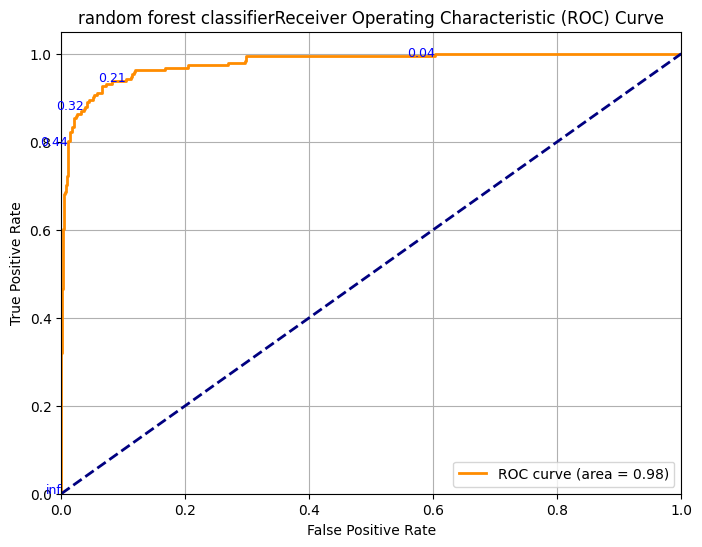

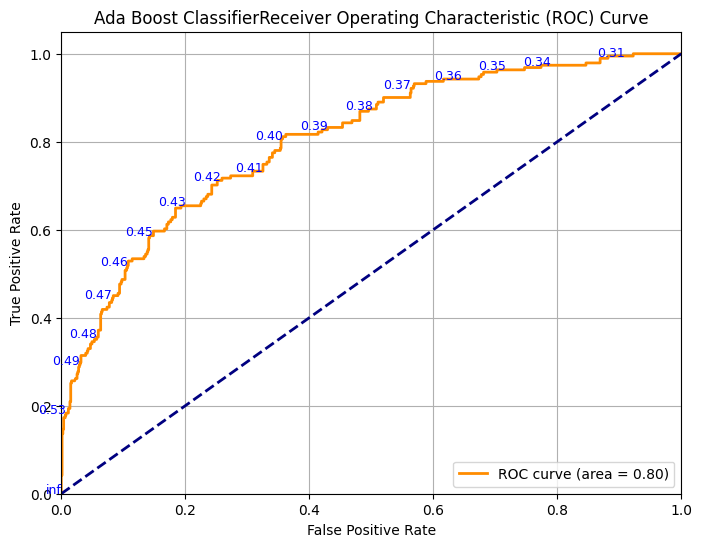

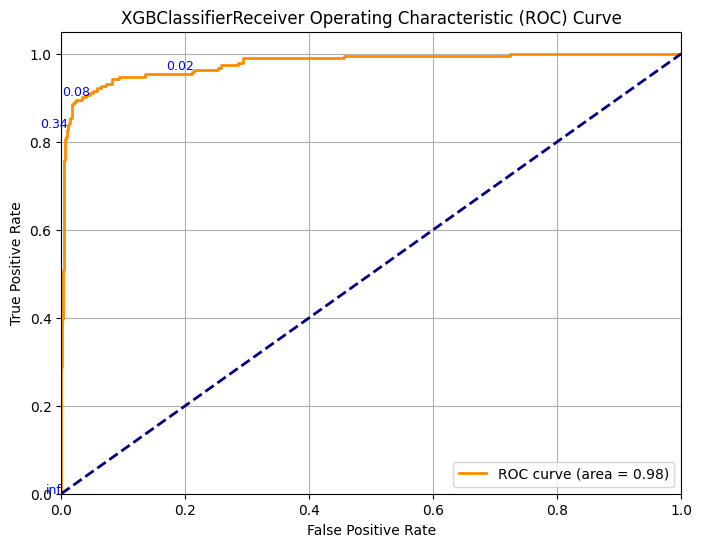

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
model = {
    "random forest classifier":RandomForestClassifier(n_estimators= 1000,min_samples_split= 2, max_features= 8, max_depth= 15),
    "Ada Boost Classifier": AdaBoostClassifier(n_estimators= 80, algorithm= 'SAMME'),
    # "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators= 500, min_samples_split=2, min_samples_leaf=7, max_depth=7, loss='exponential', learning_rate=0.3, criterion='friedman_mse')
    "XGBClassifier":XGBClassifier(n_estimators=300, max_depth=30, learning_rate=0.1, colsample_bytree=0.8)

}

for i in range(len(list(model))):
    models = list(model.values())[i]
    models2 = list(model.keys())[i]
    models.fit(x_train,y_train)

    # Assuming y_test is your true labels and y_prob are the predicted probabilities for the test set
    y_test_prob = models.predict_proba(x_test)[:, 1]
    # Compute ROC curve and ROC area for each class
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{models2}Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

        # Plot some threshold values
    for i, thr in enumerate(thresholds):
        if i % 20 == 0:  # Plot every 20th threshold
            plt.text(fpr[i], tpr[i], f'{thr:.2f}', fontsize=9, ha='right', color='blue')

    plt.show()
   